# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response.json()["coord"]["lat"]
        city_lng = city_weather_response.json()["coord"]["lon"]
        city_max_temp = city_weather_response.json()["main"]["temp_max"]
        city_humidity = city_weather_response.json()["main"]["humidity"]
        city_clouds = city_weather_response.json()["clouds"]["all"]
        city_wind = city_weather_response.json()["wind"]["speed"]
        city_country = city_weather_response.json()["sys"]["country"]
        city_date = city_weather_response.json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | karaul
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | tacuati
Processing Record 20 of Set 1 | meyungs
City not found. Skipping...
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,19.29,91,100,5.10,RU,1669081134
1,butaritari,3.0707,172.7902,81.46,78,22,14.00,KI,1669081395
2,rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,1669081395
3,yellowknife,62.4560,-114.3525,27.12,100,100,0.00,CA,1669081201
4,atuona,-9.8000,-139.0333,78.01,68,1,14.76,PF,1669081263
...,...,...,...,...,...,...,...,...,...
560,montevideo,-34.8335,-56.1674,62.51,85,100,20.00,UY,1669081824
561,opuwo,-18.0607,13.8400,68.13,59,81,5.57,NA,1669081825
562,pandharpur,17.6667,75.3333,67.50,49,99,5.14,IN,1669081825
563,chudovo,59.1167,31.6833,20.03,90,100,5.57,RU,1669081826


In [45]:
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,19.29,91,100,5.10,RU,1669081134
1,butaritari,3.0707,172.7902,81.46,78,22,14.00,KI,1669081395
2,rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,1669081395
3,yellowknife,62.4560,-114.3525,27.12,100,100,0.00,CA,1669081201
4,atuona,-9.8000,-139.0333,78.01,68,1,14.76,PF,1669081263


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,19.29,91,100,5.10,RU,1669081134
1,butaritari,3.0707,172.7902,81.46,78,22,14.00,KI,1669081395
2,rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,1669081395
3,yellowknife,62.4560,-114.3525,27.12,100,100,0.00,CA,1669081201
4,atuona,-9.8000,-139.0333,78.01,68,1,14.76,PF,1669081263


In [49]:
city_data

[{'City': 'nikolskoye',
  'Lat': 59.7035,
  'Lng': 30.7861,
  'Max Temp': 19.29,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 5.1,
  'Country': 'RU',
  'Date': 1669081134},
 {'City': 'butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 81.46,
  'Humidity': 78,
  'Cloudiness': 22,
  'Wind Speed': 14,
  'Country': 'KI',
  'Date': 1669081395},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 72.73,
  'Humidity': 83,
  'Cloudiness': 100,
  'Wind Speed': 17.02,
  'Country': 'PF',
  'Date': 1669081395},
 {'City': 'yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': 27.12,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 0,
  'Country': 'CA',
  'Date': 1669081201},
 {'City': 'atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 78.01,
  'Humidity': 68,
  'Cloudiness': 1,
  'Wind Speed': 14.76,
  'Country': 'PF',
  'Date': 1669081263},
 {'City': 'lagoa',
  'Lat': 39.05,
  'Lng': -27.9833,
  'Max Temp': 64.42,
  'Humidity': 

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

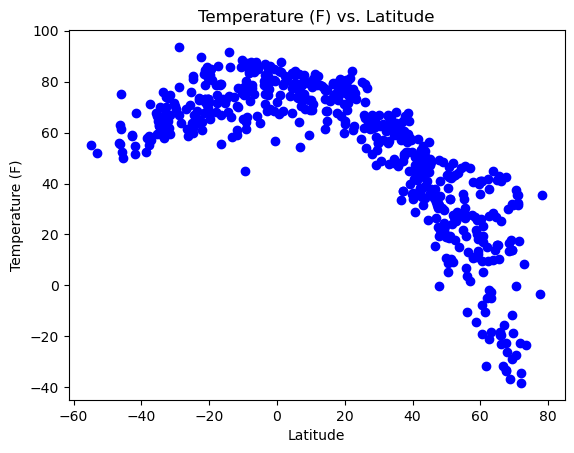

In [50]:
# Build scatter plot for latitude vs. temperature (f)
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [51]:
## Analysis
# The data show warmer temperatures at the equator and cooler as the distance from the equator increases.
# Therefore, temperatures are warmer at, or near, the equator.

#### Latitude Vs. Humidity

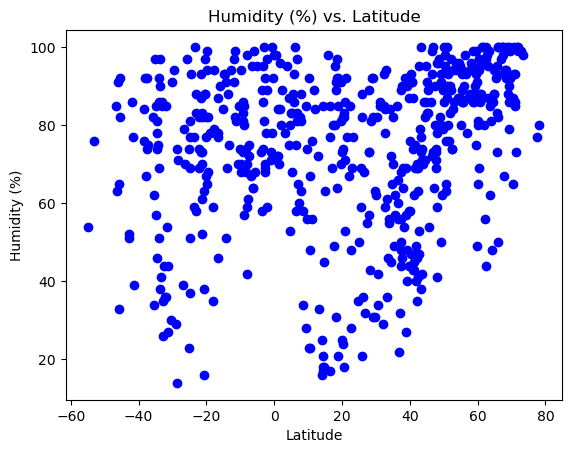

In [52]:
# Build the scatter plots for latitude vs. humidity
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [53]:
## Analysis
# The data seem to show that humidity increases as latitude increases, especially between a latitude of 40-70.  However,
# overall, humidity is scattered.

#### Latitude Vs. Cloudiness

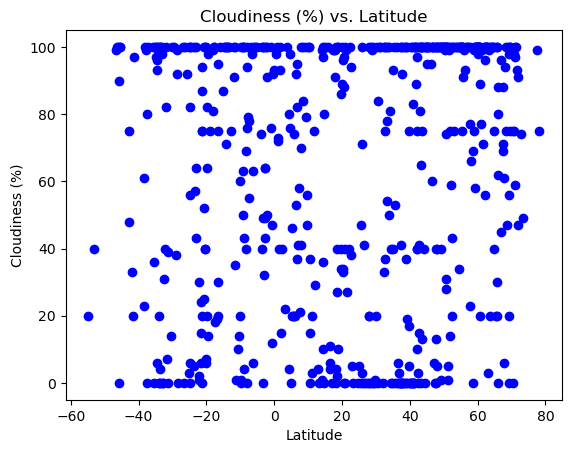

In [54]:
# Build the scatter plots for latitude vs. cloudiness
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [55]:
## Analysis
# The data appear to show that cloudiness is inconsistent and unpredictable overall.  However, it does appear that 100%
# cloudiness outnumbers scattered cloudiness, in the 10-90% range, as the solid dots at 100% seem to indicate.  There is
# a similar, but lesser, concentration at 0% cloudiness.

#### Latitude vs. Wind Speed Plot

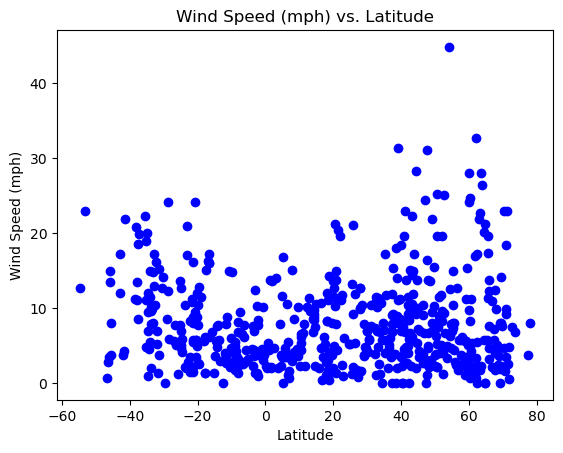

In [56]:
# Build the scatter plots for latitude vs. wind speed
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [57]:
## Analysis
# The data seem to show that wind speed increases at higher latitudes while remaining stable near the equator. Wind speed
# also appears to be generally lower at the lower latitudes vs. the wind speed at higher latitudes.  Wind speed variances
# between the lower and higher latitudes do not seem significant.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,19.29,91,100,5.10,RU,1669081134
1,butaritari,3.0707,172.7902,81.46,78,22,14.00,KI,1669081395
2,rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,1669081395
3,yellowknife,62.4560,-114.3525,27.12,100,100,0.00,CA,1669081201
4,atuona,-9.8000,-139.0333,78.01,68,1,14.76,PF,1669081263
...,...,...,...,...,...,...,...,...,...
560,montevideo,-34.8335,-56.1674,62.51,85,100,20.00,UY,1669081824
561,opuwo,-18.0607,13.8400,68.13,59,81,5.57,NaN,1669081825
562,pandharpur,17.6667,75.3333,67.50,49,99,5.14,IN,1669081825


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,19.29,91,100,5.10,RU,1669081134
1,butaritari,3.0707,172.7902,81.46,78,22,14.00,KI,1669081395
3,yellowknife,62.4560,-114.3525,27.12,100,100,0.00,CA,1669081201
5,lagoa,39.0500,-27.9833,64.42,90,100,31.34,PT,1669081397
9,kapaa,22.0752,-159.3190,84.18,67,40,19.57,US,1669081118


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,1669081395
4,atuona,-9.8000,-139.0333,78.01,68,1,14.76,PF,1669081263
6,arraial do cabo,-22.9661,-42.0278,73.45,88,43,21.00,BR,1669081361
7,punta arenas,-53.1500,-70.9167,51.91,76,40,23.02,CL,1669081399
8,geraldton,-28.7667,114.6000,93.61,14,92,24.16,AU,1669081399


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7345999843253345


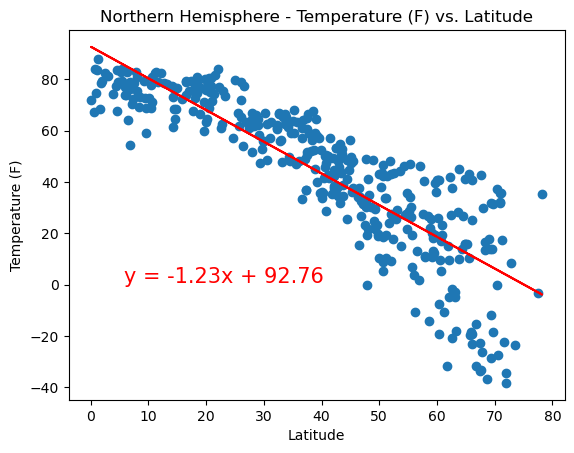

In [61]:
# Linear regression on Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [62]:
## Analysis
# With an R-value of 0.7345, the data show that there is a strong correlation between temperature a latitude. The plot also
# shows that as we move toward the equator, at 0 latitude, temperature increases, while moving toward the higher latitudes
# of the Northern Hemisphere, the temperature decreases.

The r-value is: 0.34093843133412904


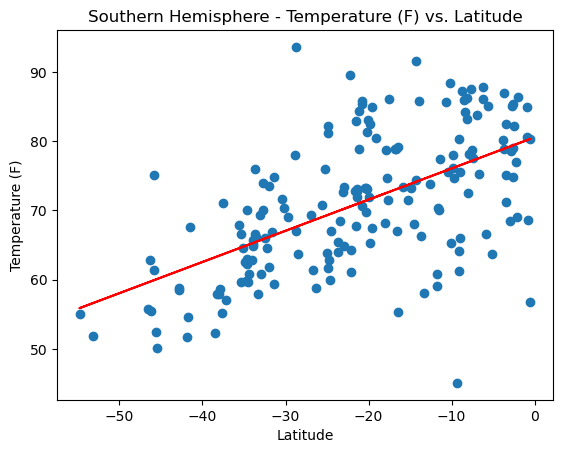

In [63]:
# Linear regression on Southern Hemisphere
%matplotlib inline
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [64]:
## Analysis
# With an R-value of .3409, there is a weaker correlation between temperature and latitude in the Southern Hemisphere.
# Still, temperatures do increase as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13059714873688041


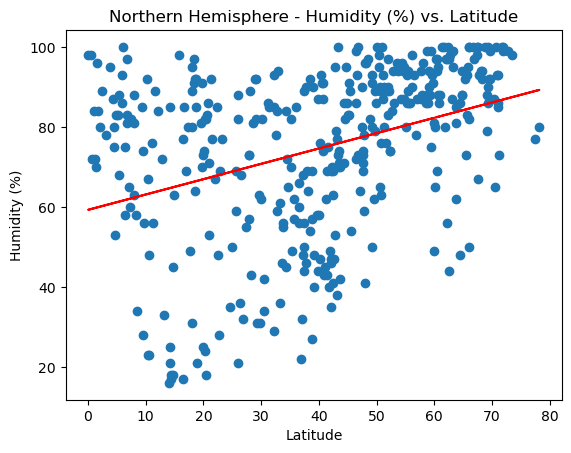

In [65]:
# Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [66]:
## Analysis
# With an R-value of .1305, there is a weak correlation between humidity and latitude. That said, humidity does increase
# as we move to higher latitudes.

The r-value is: 0.06027160985864852


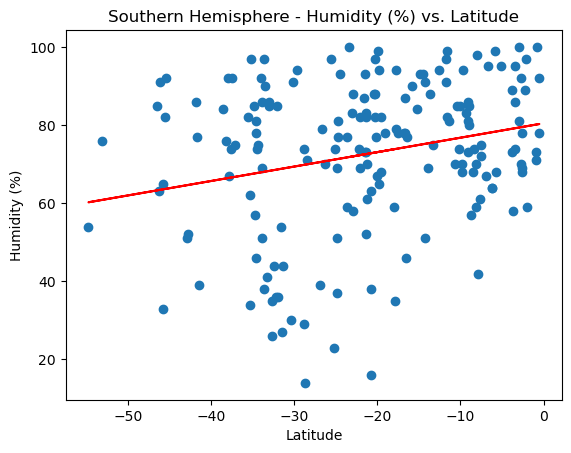

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [68]:
## Analysis
# With an R-value of .0602, there is really no correlation between humidity and latitude in the Southern Hemishere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05747367726751138


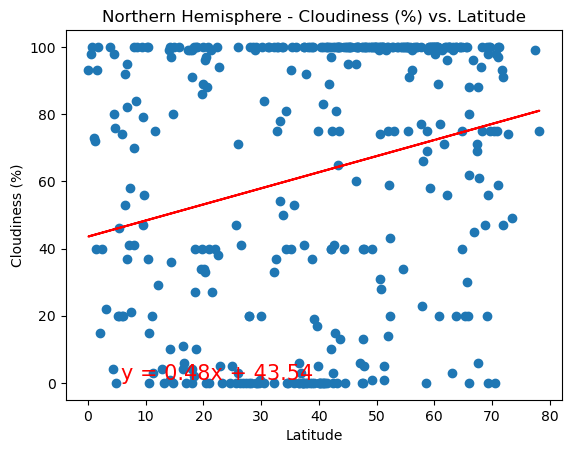

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()


In [70]:
## Analysis
# With an R-value of .0574, there is really no correlation between cloudiness and latitude in the Northern Hemishere.  Although,
# as mentioned previously, the concentrations of 100% and 0% cloudiness are interesting and could be an interesting study.

The r-value is: 0.0029253907914371306


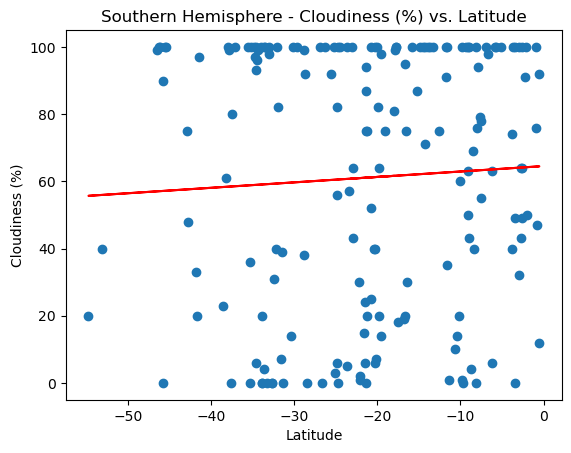

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [72]:
## Analysis
# With an R-value of .0029, there is really no correlation between cloudiness and latitude in the Southern Hemishere.  And,
# the concentrations of 100% and 0% cloudiness do not seem as pronounced.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017614945894444834


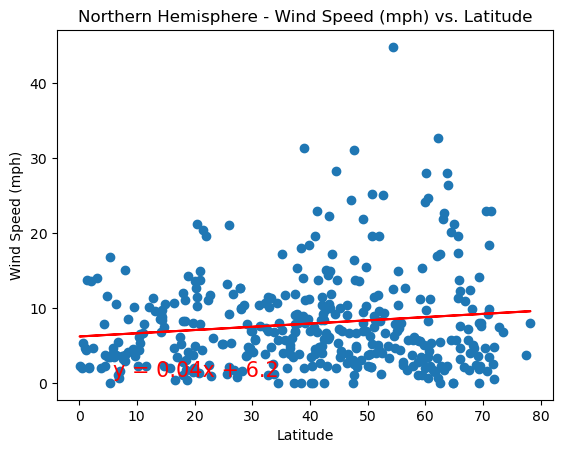

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [74]:
## Analysis
# With an R-value of .0176 and the plot we see, there is no correlation between the higher latitudes and wind speed.

The r-value is: 0.16151990159718768


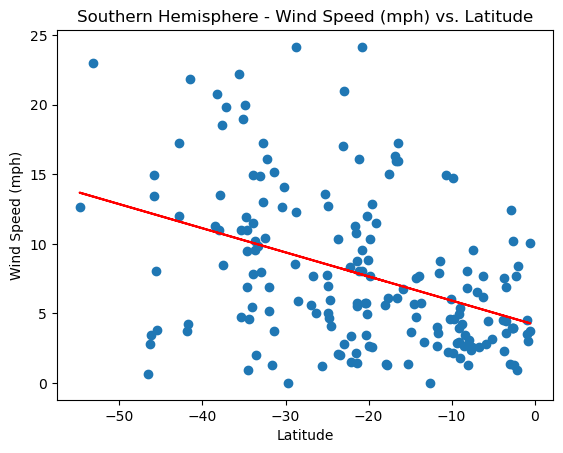

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [76]:
## Analysis
# With an R-value of .1615 and the plot we see, there appears to be a weak correlation between the lower latitudes and wind speed.
# Certainly more pronounced than the Northern Hemisphere.